# 聚类

## 1. 评判指标

### 1.1 外部指标
对数据集 $D=\{x_1,x_2,\cdots,x_m\}$，假定通过聚类给出的簇划分为 $\mathrm{C}=\{C_1,C_2,\cdots,C_k\}$，参考模型给出的簇划分为 $\mathrm{C}^*=\{C_1^*,C_2^*\cdots,C_s^*\}$。令 $\lambda$ 与 $\lambda^*$ 分别表示 $\mathrm{C}$ 与 $\mathrm{C}^*$ 对应的簇标记向量。下面将样本两两配对，并定义：
$$
\begin{aligned}
a=|SS|,\quad&SS=\{(x_i,x_j)| \lambda_i = \lambda_j,\lambda_i^*=\lambda_j^*,i<j\}\\
b=|SD|,\quad&SD=\{(x_i,x_j)| \lambda_i = \lambda_j,\lambda_i^*\neq\lambda_j^*,i<j\}\\
c=|DS|,\quad&SD=\{(x_i,x_j)| \lambda_i \neq \lambda_j,\lambda_i^* =\lambda_j^*,i<j\}\\
d=|DD|,\quad&SD=\{(x_i,x_j)| \lambda_i \neq \lambda_j,\lambda_i^*\neq\lambda_j^*,i<j\}
\end{aligned}
$$

由此可以导出如下几个常用的聚类性能度量外部指标：
- Jaccard 系数（JC）
$$
JC = \dfrac{a}{a+b+c}
$$
- FM 指数（FMI）
$$
FMI=\sqrt{\dfrac{a}{a+b}\cdot\dfrac{a}{a+c}}
$$
- Rand 指数（RI）
$$
RI = \dfrac{2(a+d)}{m(m-1)}
$$
上述指标均在 $[0,1]$，且取值越大聚类效果越好。

### 1.2 内部指标
对于给定的簇划分 $\mathrm{C} = \{C_1,C_2,\cdots,C_k\}$,定义
$$\begin{aligned} \operatorname{avg}(C) &=\frac{2}{|C|(|C|-1)} \sum_{1 \leqslant i<j \leqslant|C|} \operatorname{dist}\left(\boldsymbol{x}_i, \boldsymbol{x}_j\right), \\ \operatorname{diam}(C) &=\max _{1 \leqslant i<j \leqslant|C|} \operatorname{dist}\left(\boldsymbol{x}_i, \boldsymbol{x}_j\right) \\ d_{\min }\left(C_i, C_j\right) &=\min _{\boldsymbol{x}_i \in C_i, \boldsymbol{x}_j \in C_j} \operatorname{dist}\left(\boldsymbol{x}_i, \boldsymbol{x}_j\right) \\ d_{\mathrm{cen}}\left(C_i, C_j\right) &=\operatorname{dist}\left(\boldsymbol{\mu}_i, \boldsymbol{\mu}_j\right) \end{aligned}$$
其中, $\operatorname{dist}(\cdot, \cdot)$ 用于计算两个样本之间的距离; $\boldsymbol{\mu}$ 代表簇 $C$ 的中心点

- $\operatorname{avg}(C)$:簇 $C$ 内样本间的平均距离
- $\operatorname{diam}(C)$:簇 $C$ 内样本间的最远距离
- $d_{\min }\left(C_i, C_j\right)$:簇 $C_i$ 与簇 $C_j$ 最近样本间的距离
- $d_{\mathrm{cen}}\left(C_i, C_j\right)$:簇 $C_i$ 与簇 $C_j$ 中心点间的距离
  
由上述定义可以导出下面这些内部指标:
- DB 指数(DBI)
$$
\mathrm{DBI}=\frac{1}{k} \sum_{i=1}^k \max _{j \neq i}\left(\frac{\operatorname{avg}\left(C_i\right)+\operatorname{avg}\left(C_j\right)}{d_{\mathrm{cen}}\left(\boldsymbol{\mu}_i, \boldsymbol{\mu}_j\right)}\right) .
$$
- Dunn 指数(DI)
$$
\mathrm{DI}=\min _{1 \leqslant i \leqslant k}\left\{\min _{j \neq i}\left(\frac{d_{\min }\left(C_i, C_j\right)}{\max _{1 \leqslant l k k} \operatorname{diam}\left(C_l\right)}\right)\right\} .
$$
DBI 值越小聚类效果越好, DI 值越大聚类效果越好.

代码实现如下：

In [115]:
import random
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

class Cluster:
    def __init__(self, n_clusters=None):
        self.n_clusters = n_clusters

    @staticmethod
    def external_evaluate_index(predict, label):
        num_labels = label.shape[0]
        num_predict = predict.shape[0]
        a, b, c, d = 0, 0, 0, 0
        if num_predict == num_labels:
            for i in range(num_labels):
                for j in range(i + 1, num_labels):
                    if predict[i] == predict[j]:
                        if label[i] == label[j]:
                            a += 1
                        else:
                            b += 1
                    else:
                        if label[i] == label[j]:
                            c += 1
                        else:
                            d += 1
        return a, b, c, d

    def JC(self, predict, label):
        a, b, c, _ = self.external_evaluate_index(predict, label)
        index = a / (a + b + c)
        print("Jaccard Coefficient：", index)

    def FMI(self, predict, label):
        a, b, c, _ = self.external_evaluate_index(predict, label)
        index = math.sqrt((a / (a + b)) * (a / (a + c)))
        print("Fowlkes and Mallows Index：", index)

    def RD(self, predict, label):
        num_predict = predict.shape[0]
        a, _, _, d = self.external_evaluate_index(predict, label)
        index = 2 * (a + d) / (num_predict * (num_predict - 1))
        print("Rand Index：", index)
    
    def get_clusters(self,data,predict):
        clusters = []
        n_sample = data.shape[0]
        for i in range(self.n_clusters):
            clusters.append(data[predict==i])
        return clusters
    
    @staticmethod
    def avg(cluster,p=2):
        num = len(cluster)
        dist = 0
        for i in range(num):
            for j in range(i+1,num):
                dist += np.linalg.norm(cluster[i]-cluster[j], ord=p)
        return 2/(num*(num-1))*dist 
    
    @staticmethod
    def diam(cluster,p=2):
        num = len(cluster)
        max_dist = 0
        for i in range(num):
            for j in range(i+1,num):
                dist = np.linalg.norm(cluster[i]-cluster[j], ord=p)
                if dist >max_dist:
                    max_dist = dist
        return max_dist
    
    @staticmethod
    def dmin(cluster_i, cluster_j,p=2):
        num_i = len(cluster_i)
        num_j = len(cluster_j)
        min_value = np.Inf
        for i in range(num_i):
            for j in range(num_j):
                dist = np.linalg.norm(cluster_i[i]-cluster_j[j], ord=p)
                if dist <min_value:
                    min_value = dist
        return min_value

    @staticmethod
    def dcen(cluster_i, cluster_j,p=2):
        mu_i = sum(cluster_i)/len(cluster_i)
        mu_j = sum(cluster_j)/len(cluster_j)
        return np.linalg.norm(mu_i-mu_j,ord=p)

    def DBI(self,clusters):
        DBI = 0
        for i in range(self.n_clusters):
            max_val = 0
            for j in range(self.n_clusters):
                if i != j:
                    dist = (self.avg(clusters[i])+self.avg(clusters[j]))/self.dcen(clusters[i],clusters[j])
                    if dist > max_val:
                        max_val = dist
                DBI += max_val
        DBI = DBI/self.n_clusters
        print("Davies-Bouldin Index: ",DBI)
    
    def DI(self,clusters):
        DI = np.Inf
        max_diam = 0
        for i in range(self.n_clusters):
            diam = self.diam(clusters[i])
            if max_diam < diam:
                max_diam = diam
        for i in range(self.n_clusters):
            min_value = np.Inf
            for j in range(self.n_clusters):
                if i != j:
                    val = self.dmin(clusters[i],clusters[j])/max_diam
                    if val < min_value:
                        min_value =val
            if min_value<DI:
                DI = min_value
        print("Dunn Index: ",DI)
    def evaluate_index(self, x,y,pred,clusters):
        self.JC(pred,y)
        self.FMI(pred,y)
        self.RD(pred,y)
        self.DBI(clusters)
        self.DI(clusters)
        plt.scatter(x[:, 0], x[:, 1], c=pred)

## 2.生成聚类数据
我们使用 `sklearn.make_blobs` 来生成聚类数据，其中：
- `n_features` ：样本维度，默认为 2 维数据，测试选取 2 维数据也方便进行可视化展示；
- `n_samples`：样本数据量，默认为 100；
- `centers` ：产生数据的中心端，默认为 3；
- `random_state` ：随机数种子，不同的种子产出不同的样本集合；
- `cluster_std`：数据集的标准差，浮点数或者浮点数序列，默认为1.0；
- `shuffle`：洗牌操作，默认是True。

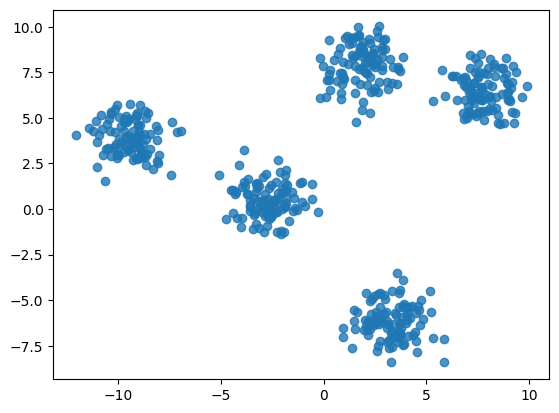

In [116]:
sample_clusters = 5
n_samples = 500
random_state =20
x, y = datasets.make_blobs(centers=sample_clusters, n_samples=n_samples,random_state=random_state)
plt.scatter(x[:,0],x[:,1],alpha=0.8)

## 3. Kmeans-Algorithm
输入:
- 样本集 $D=\left\{\boldsymbol{x}_1, \boldsymbol{x}_2, \ldots, \boldsymbol{x}_m\right\}$;
- 聚类簇数 $k$.

过程:
1. 从 $D$ 中随机选择 $k$ 个样本作为初始均值向量 $\{\mu_1,\mu_2,\cdots,\mu_k\}$
2. repeat
3. 令 $C_i=\emptyset (1\le i\le k)$
4. for $j=1,2,\cdots,m$ do
5. 计算样本 $x_j$ 与各均值向量 $\mu_i(1\le i \le k)$ 的距离：$d_{ji}=||x_j-\mu_i||_2$
6. 根据距离最近的均值向量确定 $x_j$ 的簇标记：$\lambda_j = arg \min_{i\in\{1,2,\cdots,k\}}d_{ji}$
7. 将样本 $\boldsymbol{x}_j$ 划入相应的簇: $C_{\lambda_j}=C_{\lambda_j} \cup\left\{\boldsymbol{x}_j\right\}$
8. end for
9. for $i=1,2, \ldots, k$ do
10. 计算新均值向量: $\boldsymbol{\mu}_i^{\prime}=\frac{1}{\left|C_i\right|} \sum_{\boldsymbol{x} \in C_i} \boldsymbol{x}$;
11. if $\mu_i^{\prime} \neq \mu_i$ then
12. 将当前均值向量 $\boldsymbol{\mu}_i$ 更新为 $\boldsymbol{\mu}_i^{\prime}$
13. else
14. 保持当前均值向量不变
15. end if
16. end for
17. until 当前均值向量均末更新

输出:
- 簇划分 $\mathcal{C}=\left\{C_1, C_2, \ldots, C_k\right\}$


In [137]:
class KMeans(Cluster):
    """ 实现KMeans 算法 """

    def train(self, data, p=2, max_iter=1000000):
        n_samples = data.shape[0]
        n_features = data.shape[1]
        centers = np.zeros((self.n_clusters, n_features))
        labels = np.zeros(n_samples, dtype=int)
        # 初始化聚类中心
        for i in range(self.n_clusters):
            centers[i] = data[np.random.choice(n_samples)]

        for _ in range(max_iter):
            for j in range(n_samples):
                i = np.argmin(np.linalg.norm(centers - data[j], ord=p, axis=1, keepdims=True))
                labels[j] = i

            center_old = centers.copy()
            for j in range(self.n_clusters):
                if len(np.where(labels == j)) != 0:
                    centers[j] = np.mean(data[np.where(labels == j)])
            if np.mean(np.abs(center_old - centers + 1e-10)) <= 1e-4:
                return labels

下面我们进行测试：

Jaccard Coefficient： 0.5003886862405071
Fowlkes and Mallows Index： 0.667073683982825
Rand Index： 0.8660521042084168
Davies-Bouldin Index:  12.025321050619874
Dunn Index:  0.006300964138867153


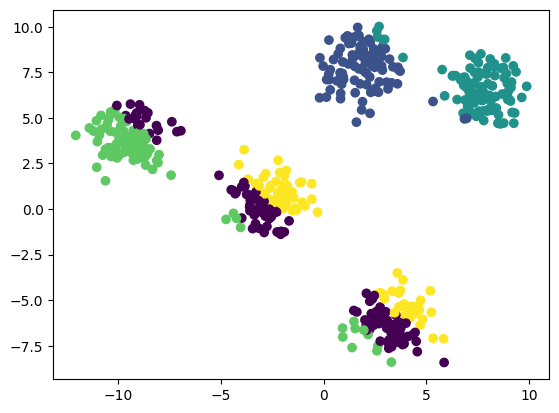

In [144]:
kmeans = KMeans(5)
pred = kmeans.train(x)
clusters = kmeans.get_clusters(x,pred)
kmeans.evaluate_index(x,y,pred,clusters)

## 4. LVQ Alogrithm
输入:
- 样本集 $D=\left\{\left(\boldsymbol{x}_1, y_1\right),\left(\boldsymbol{x}_2, y_2\right), \ldots,\left(\boldsymbol{x}_m, y_m\right)\right\}$;
- 原型向量个数 $q$, 各原型向量预设的类别标记 $\left\{t_1, t_2, \ldots, t_q\right\}$
- 学习率 $\eta \in(0,1)$.

过程:
1. 初始化一组原型向量 $\left\{\boldsymbol{p}_1, \boldsymbol{p}_2, \ldots, \boldsymbol{p}_q\right\}$
2. repeat
3. 从样本集 $D$ 随机选取样本 $\left(\boldsymbol{x}_j, y_j\right) ;$
4. 计算样本 $\boldsymbol{x}_j$ 与 $\boldsymbol{p}_i(1 \leqslant i \leqslant q)$ 的距离: $d_{j i}=\left\|\boldsymbol{x}_j-\boldsymbol{p}_i\right\|_2 ;$
5. 找出与 $\boldsymbol{x}_j$ 距离最近的原型向量 $p_{i^*}, i^*=\arg \min _{i \in\{1,2, \ldots, q\}} d_{j i} ;$
6. if $y_j=t_{i^*}$ then
7. $\boldsymbol{p}^{\prime}=\boldsymbol{p}_{i^*}+\eta \cdot\left(\boldsymbol{x}_j-\boldsymbol{p}_{i^*}\right)$
8. else
9. $\quad \boldsymbol{p}^{\prime}=\boldsymbol{p}_{i^*}-\eta \cdot\left(\boldsymbol{x}_j-\boldsymbol{p}_{i^*}\right)$
10. end if
11. 将原型向量 $\boldsymbol{p}_{i^*}$ 更新为 $\boldsymbol{p}^{\prime}$
12. until 满足停止条件

输出：
- 原型向量：$\{p_1,p_2,\cdots,p_q\}$


In [145]:
class LVQ(Cluster):
    def __init__(self, n_clusters=None):
        super().__init__(n_clusters)
        self.p = None

    def train(self, data, label, max_iter=1000000, lr=0.01):
        n_samples = data.shape[0]
        n_features = data.shape[1]
        labels = np.unique(label)
        n_labels = len(labels)
        self.p = np.zeros((self.n_clusters, n_features))
        label_p = np.zeros(self.n_clusters, dtype=int)

        # 初始化原型向量
        for i in range(self.n_clusters):
            self.p[i] = data[np.random.choice(np.where(label == labels[i % n_labels])[0])]
            label_p[i] = labels[i % n_labels]

        # 训练样本
        for _ in range(max_iter):
            p = self.p.copy()
            for j in range(n_samples):
                i = np.argmin(np.linalg.norm(self.p - data[j], ord=2, axis=1, keepdims=True))
                if label[j] == label_p[i]:
                    self.p[i] += lr * (data[j] - self.p[i])
                else:
                    self.p[i] -= lr * (data[j] - self.p[i])

            if np.mean(np.abs(p - self.p) < 1e-4):
                break

            return self.predict(data)

    def predict(self, x):
        n_test = x.shape[0]
        pred = np.zeros(n_test, dtype=int)

        for j in range(n_test):
            pred[j] = np.argmin(np.linalg.norm(x[j] - self.p, ord=2, axis=1, keepdims=True))
        return pred

下面我们进行测试，我们先使用 Kmean，将样本聚乘 3 类，将结果作为 LVQ 的标签，再聚成 5类

Jaccard Coefficient： 1.0
Fowlkes and Mallows Index： 1.0
Rand Index： 1.0
Davies-Bouldin Index:  1.8377832210666631
Dunn Index:  0.3661537694459286


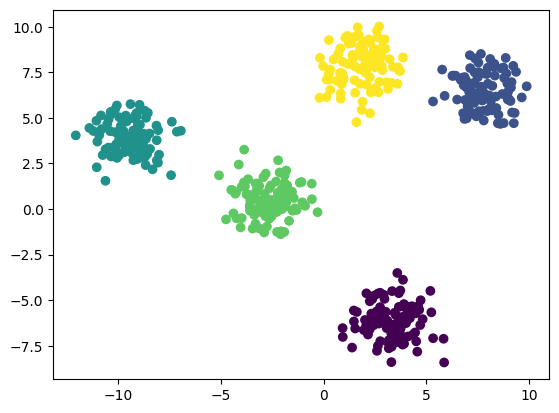

In [151]:
# kmeans
kmeans = KMeans(3)
pred_k = kmeans.train(x)

lvq = LVQ(5)
pred_l = lvq.train(x,pred_k)
clusters_l = lvq.get_clusters(x,pred_l)
lvq.evaluate_index(x,y,pred_l,clusters_l)

## 5. GMM Algorithm
输入:
- 样本集 $D=\left\{\boldsymbol{x}_1, \boldsymbol{x}_2, \ldots, \boldsymbol{x}_m\right\}$;
- 高斯混合成分个数 $k$.

过程:
1. 初始化高斯混合分布的模型参数 $\left\{\left(\alpha_i, \boldsymbol{\mu}_i, \boldsymbol{\Sigma}_i\right) \mid 1 \leqslant i \leqslant k\right\}$
2. repeat
3. for $j=1,2, \ldots, m$ do
4. 根据式$\begin{aligned} p_{\mathcal{M}}\left(z_j=i \mid \boldsymbol{x}_j\right) &=\frac{P\left(z_j=i\right) \cdot p_{\mathcal{M}}\left(\boldsymbol{x}_j \mid z_j=i\right)}{p_{\mathcal{M}}\left(\boldsymbol{x}_j\right)} \\ &=\frac{\alpha_i \cdot p\left(\boldsymbol{x}_j \mid \boldsymbol{\mu}_i, \boldsymbol{\Sigma}_i\right)}{\sum_{l=1}^k \alpha_l \cdot p\left(\boldsymbol{x}_j \mid \boldsymbol{\mu}_l, \boldsymbol{\Sigma}_l\right)} \end{aligned}$计算 $\boldsymbol{x}_j$ 由各混合成分生成的后验概率, 即 $\gamma_{j i}=p_{\mathcal{M}}\left(z_j=i \mid \boldsymbol{x}_j\right)(1 \leqslant i \leqslant k)$
5. end for
6. for $i=1,2, \ldots, k$ do
7. 计算新均值向量: $\boldsymbol{\mu}_i^{\prime}=\frac{\sum_{j=1}^m \gamma_{j i} x_j}{\sum_{j=1}^m \gamma_{j i}}$;
8. 计算新协方差矩阵: $\boldsymbol{\Sigma}_i^{\prime}=\frac{\sum_{j=1}^m \gamma_{j i}\left(\boldsymbol{x}_j-\boldsymbol{\mu}_i^{\prime}\right)\left(\boldsymbol{x}_j-\boldsymbol{\mu}_i^{\prime}\right)^{\mathrm{T}}}{\sum_{j=1}^m \gamma_{j i}}$;
9. 计算新混合系数: $\alpha_i^{\prime}=\frac{\sum_{j=1}^m \gamma_{j i}}{m}$
10. end for
11. 将模型参数 $\left\{\left(\alpha_i, \boldsymbol{\mu}_i, \boldsymbol{\Sigma}_i\right) \mid 1 \leqslant i \leqslant k\right\}$ 更新为 $\left\{\left(\alpha_i^{\prime}, \boldsymbol{\mu}_i^{\prime}, \boldsymbol{\Sigma}_i^{\prime}\right) \mid 1 \leqslant i \leqslant k\right\}$
12. until 满足停止条件
13. $C_i=\varnothing(1 \leqslant i \leqslant k)$
14. for $j=1,2, \ldots, m$ do
15. 根据式 $\lambda_j=\underset{i \in\{1,2, \ldots, k\}}{\arg \max } \gamma_{j i}$ 确定 $\boldsymbol{x}_j$ 的簇标记 $\lambda_j$;
16. 将 $\boldsymbol{x}_j$ 划入相应的簇: $C_{\lambda_j}=C_{\lambda_j} \cup\left\{\boldsymbol{x}_j\right\}$
17. end for

输出:
- 簇划分 $\mathcal{C}=\left\{C_1, C_2, \ldots, C_k\right\}$

In [154]:
class GMM(Cluster):

    def train(self, data, max_iter=1000000):
        n_samples = data.shape[0]
        n_features = data.shape[1]
        alpha = np.zeros(self.n_clusters)
        mu = np.zeros((self.n_clusters, n_features))
        sigma = np.zeros((self.n_clusters, n_features, n_features))
        for i in range(self.n_clusters):
            alpha[i] = np.random.random(1) + 0.1
            mu[i] = np.random.random(n_features) * np.mean(data)
            sigma[i] = np.diag([1, 1])
        alpha = alpha / np.sum(alpha)
        for _ in range(max_iter):
            gamma = np.zeros((self.n_clusters, n_samples))
            for j in range(n_samples):
                for i in range(self.n_clusters):
                    gamma[i, j] = stats.multivariate_normal.pdf(data[j], mu[i], sigma[i])
                gamma[:, j] = gamma[:, j] / np.sum(gamma[:, j])
            alpha_old = alpha.copy()
            for i in range(self.n_clusters):
                mu[i] = np.dot(gamma[i], data) / np.sum(gamma[i])
                for j in range(n_samples):
                    sigma[i] += gamma[i, j] * np.dot(data[j] - mu[i], (data[j] - mu[i]).T)
                alpha[i] = np.sum(gamma[i]) / n_samples
            if np.mean(np.abs(alpha - alpha_old)) < 1e-4:
                pred = np.argmax(gamma, axis=0)
                return pred


下面我们进行测试

Jaccard Coefficient： 0.7467894439740334
Fowlkes and Mallows Index： 0.8550423349320266
Rand Index： 0.9424689378757515
Davies-Bouldin Index:  3.8197176519433476
Dunn Index:  0.01128388724182057


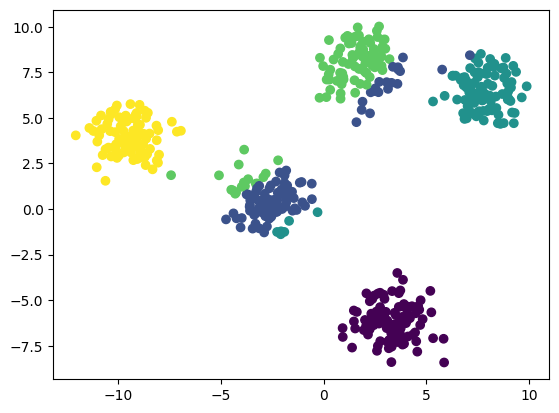

In [156]:
gmm = GMM(5)
pred = gmm.train(x)
clusters = gmm.get_clusters(x,pred)
gmm.evaluate_index(x,y,pred,clusters)

## 6. DBSCAN Algorithm
输入:
- 样本集 $D=\left\{\boldsymbol{x}_1, \boldsymbol{x}_2, \ldots, \boldsymbol{x}_m\right\}$;
- 邻域参数 $(\epsilon$, MinPts $)$.

过程:
1. 初始化核心对象集合: $\Omega=\varnothing$
2. for $j=1,2, \ldots, m$ do
3. 确定样本 $\boldsymbol{x}_j$ 的 $\epsilon$-邻域 $N_\epsilon\left(\boldsymbol{x}_j\right)$;
4. if $\left|N_\epsilon\left(\boldsymbol{x}_j\right)\right| \geqslant$ MinPts then
5. 将样本 $\boldsymbol{x}_j$ 加入核心对象集合: $\Omega=\Omega \bigcup\left\{\boldsymbol{x}_j\right\}$
6. end if
7. end for
8. 初始化聚类簇数: $k=0$
9. 初始化末访问样本集合: $\Gamma=D$
10. while $\Omega \neq \varnothing$ do
11. 记录当前末访问样本集合: $\Gamma_{\mathrm{old}}=\Gamma ;$
12. 随机选取一个核心对象 $\boldsymbol{o} \in \Omega$, 初始化队列 $Q=<\boldsymbol{o}>;$
13. $\Gamma=\Gamma \backslash\{\boldsymbol{o}\} ;$
14. while $Q \neq \varnothing$ do
15. 取出队列 $Q$ 中的首个样本 $\boldsymbol{q} ;$
16. if $\left|N_\epsilon(\boldsymbol{q})\right| \geqslant M$ inPts then
17. 令 $\Delta=N_\epsilon(\boldsymbol{q}) \bigcap \Gamma ;$
18. 将 $\Delta$ 中的样本加入队列 $Q ;$
19. $\Gamma=\Gamma \backslash \Delta ;$
20. end if
21. end while
22. $k=k+1$, 生成聚类簇 $C_k=\Gamma_{\text {old }} \backslash \Gamma ;$
23. $\Omega=\Omega \backslash C_k$
24. end while

输出:
- 簇划分 $\mathcal{C}=\left\{C_1, C_2, \ldots, C_k\right\}$

In [157]:
class DBSCAN(Cluster):
    def __init__(self, MinPts=5, radius=1, n_clusters=None):
        super().__init__(n_clusters)
        self.MinPts = MinPts  # 核心对象最小样本数
        self.radius = radius  # 核心点领域大小

    def is_reachable(self, x, y):
        dist = math.sqrt(sum((x[i] - y[i]) ** 2 for i in range(len(x))))
        return dist <= self.radius

    # 判断 point 是否为核心点，并寻找一个点的领域中的点
    def seek_neighbours(self, point, data):
        neighbour = set()
        for index, pn in enumerate(data):
            if self.is_reachable(point, pn):
                neighbour.add(index)
        is_keypoint = len(neighbour) >= self.MinPts
        return is_keypoint, neighbour

    def train(self, data):
        un_visit = set([i for i in range(data.shape[0])])
        cluster = -1 * np.ones(data.shape[0])
        k = 0
        while len(un_visit):
            p = random.choice(list(un_visit))
            un_visit.remove(p)
            is_keypoint, neighbours = self.seek_neighbours(data[p], data)
            # 如果是核心点，则添加一个类簇
            if is_keypoint:
                cluster[p] = k
                # 核心点需要找其所有密度相连的点
                while neighbours:
                    index = neighbours.pop()
                    if index in un_visit:
                        un_visit.remove(index)
                        is_keypoint, neigh_of_neigh = self.seek_neighbours(data[index], data)
                        if is_keypoint:
                            neighbours |= neigh_of_neigh
                    cluster[index] = k
                k += 1
        self.n_clusters = k
        return cluster

下面我们进行测试：

Jaccard Coefficient： 0.9797245446100408
Fowlkes and Mallows Index： 0.9898067016271469
Rand Index： 0.9959759519038076
Davies-Bouldin Index:  2.0753639776757704
Dunn Index:  0.37604617651168115


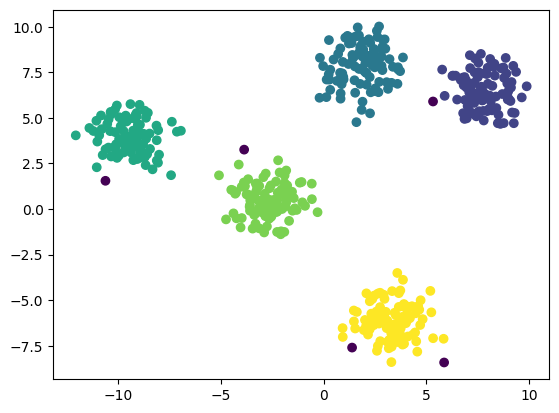

In [158]:
dbscan = DBSCAN()
pred = dbscan.train(x)
clusters = dbscan.get_clusters(x,pred)
dbscan.evaluate_index(x,y,pred,clusters)

## 7. AGNES Algorithm
输入:
- 样本集 $D=\left\{\boldsymbol{x}_1, \boldsymbol{x}_2, \ldots, \boldsymbol{x}_m\right\}$;
- 聚类簇距离度量函数 $d$;
- 聚类簇数 $k$.

过程:
1. for $j=1,2, \ldots, m$ do
2. $\quad C_j=\left\{\boldsymbol{x}_j\right\}$
3. end for
4. for $i=1,2, \ldots, m$ do
5. $\quad$ for $j=1,2, \ldots, m$ do
6. $\qquad M(i, j)=d\left(C_i, C_j\right)$
7. $\qquad M(j, i)=M(i, j)$
8. $\quad$ end for
9. end for
10. 设置当前聚类簇个数: $q=m$
11. while $q>k$ do
12. 找出距离最近的两个聚类簇 $C_{i^*}$ 和 $C_{j^*}$;
13. 合并 $C_{i^*}$ 和 $C_{j^*}: C_{i^*}=C_{i^*} \cup C_{j^*}$;
14. for $j=j^*+1, j^*+2, \ldots, q$ do
15. 将聚类簇 $C_j$ 重编号为 $C_{j-1}$
16. end for
17. 删除距离矩阵 $M$ 的第 $j^*$ 行与第 $j^*$ 列;
18. for $j=1,2, \ldots, q-1$ do
19. $M\left(i^*, j\right)=d\left(C_{i^*}, C_j\right)$;
20. $M\left(j, i^*\right)=M\left(i^*, j\right)$
21. end for
22. $q=q-1$
23. end while

输出:
- 簇划分 $\mathcal{C}=\left\{C_1, C_2, \ldots, C_k\right\}$

In [160]:
class AGENS(Cluster):
    @staticmethod
    def dist_min(cluster_x, cluster_y):
        return min(np.linalg.norm(s1 - s2) for s1 in cluster_x for s2 in cluster_y)

    @staticmethod
    def dist_max(cluster_x, cluster_y):
        return max(np.linalg.norm(s1 - s2) for s1 in cluster_x for s2 in cluster_y)

    @staticmethod
    def dist_avg(cluster_x, cluster_y):
        return sum(np.linalg.norm(s1 - s2) for s1 in cluster_x for s2 in cluster_y) / (len(cluster_y) * len(cluster_x))

    @staticmethod
    def create_distance_matrix(data, clusters, distance_method):
        num = len(clusters)
        distance_matrix = np.zeros((num, num))
        for i in range(num):
            for j in range(i):
                distance_matrix[i][j] = distance_method(data[clusters[i]], data[clusters[j]])
                distance_matrix[j][i] = distance_matrix[i][j]
        return distance_matrix

    @staticmethod
    def find_min(distance_matrix):
        num = distance_matrix.shape[0]
        min_distance = distance_matrix[0][1]
        x = 0
        y = 1
        for i in range(num):
            for j in range(num):
                if i != j and distance_matrix[i][j] < min_distance:
                    min_distance = distance_matrix[i][j]
                    x = i
                    y = j
        return x, y, min_distance

    def train(self, data, distance_method="min"):
        method = {"min": self.dist_min, "max": self.dist_max, "avg": self.dist_avg}
        distance_method = method.get(distance_method)
        clusters = []
        n_samples = data.shape[0]
        for i in range(n_samples):
            clusters.append([i])
        distance_matrix = self.create_distance_matrix(data, clusters, distance_method)
        index = distance_matrix.shape[0]
        while index > self.n_clusters:
            id_x, id_y, min_distance = self.find_min(distance_matrix)
            clusters[id_x].extend(clusters[id_y])
            clusters.pop(id_y)
            distance_matrix = self.create_distance_matrix(data, clusters, distance_method)
            index -= 1
        pred = np.zeros(n_samples)
        for k in range(self.n_clusters):
            pred[clusters[k]] = k
        return pred

下面我们进行测试：

Jaccard Coefficient： 1.0
Fowlkes and Mallows Index： 1.0
Rand Index： 1.0
Davies-Bouldin Index:  1.9038808416292372
Dunn Index:  0.3661537694459286


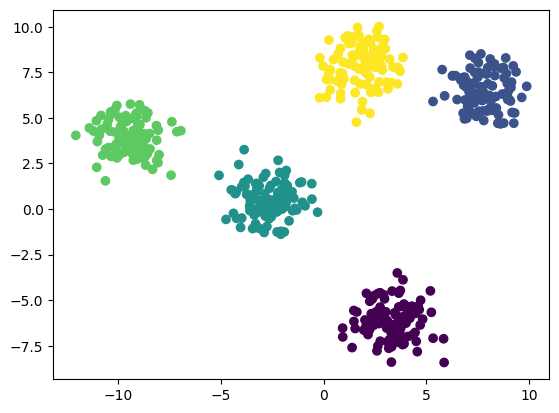

Jaccard Coefficient： 1.0
Fowlkes and Mallows Index： 1.0
Rand Index： 1.0
Davies-Bouldin Index:  1.9038808416292372
Dunn Index:  0.3661537694459286


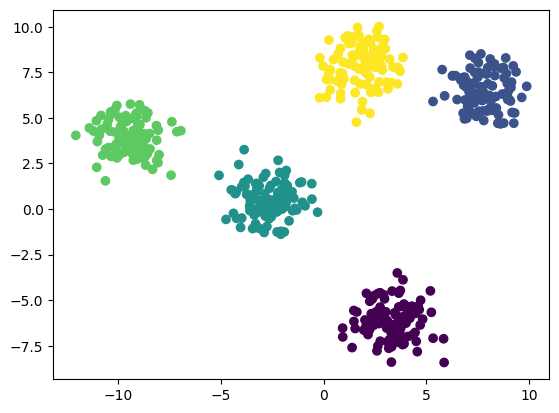

In [162]:
agens = AGENS(5)
pred = agens.train(x)
clusters = agens.get_clusters(x,pred)
agens.evaluate_index(x,y,pred,clusters)

## 8. Demonstration of k-means assumptions
This example is meant to illustrate situations where k-means will produce unintuitive and possibly unexpected clusters. In the first three plots, the input data does not conform to some implicit assumption that k-means makes and undesirable clusters are produced as a result. In the last plot, k-means returns intuitive clusters despite unevenly sized blobs.

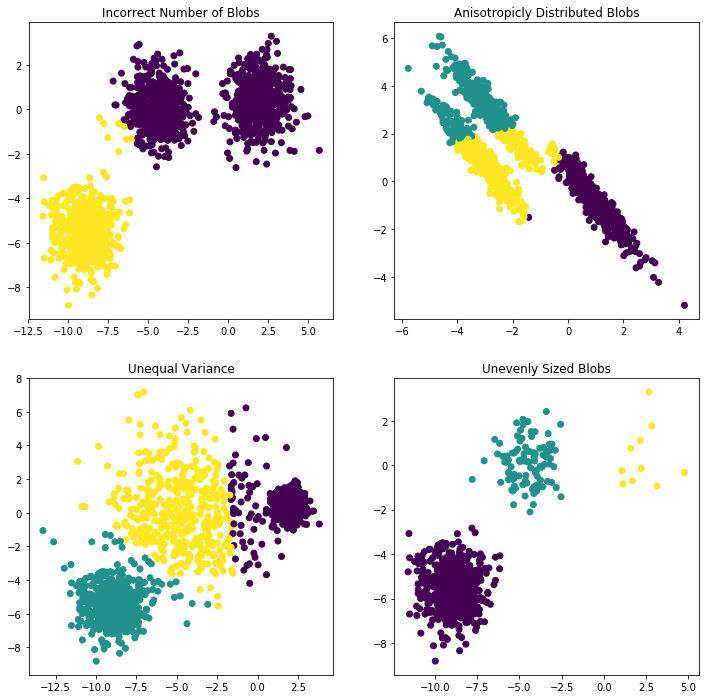

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

## 9. Demonstration of when standarlization failed

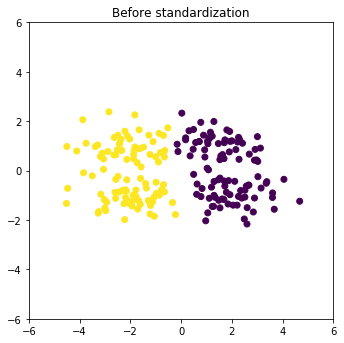

[0.96392167 1.28690303]
[1.00290133 1.27880166]


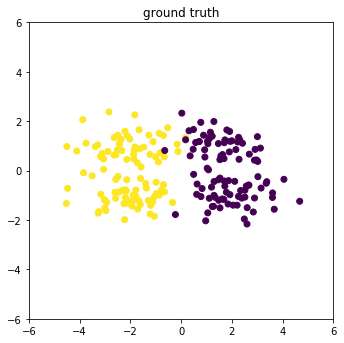

[0.20712484 1.00258615]
[0.21550069 0.99627462]


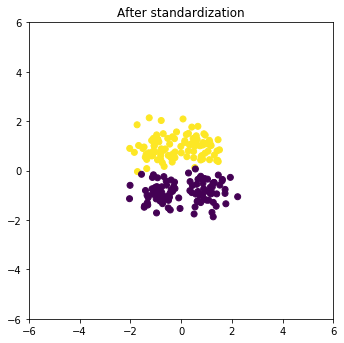

In [2]:
from sklearn.preprocessing import StandardScaler
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
n = 100
def my_blob():
    x1 = np.random.normal(-1.9, 1, (n,1))
    x2 = np.random.normal(1.9, 1, (n,1))
    y1 = np.random.normal(1, 0.5, (int( n/2 ),1)) 
    y11 = np.random.normal(-1, 0.5, (int( n/2 ),1))
    y1 = np.concatenate((y1, y11), axis=0)
    y2 = np.random.normal(1, 0.5, (int( n/2 ),1))
    y22 = np.random.normal(-1, 0.5, (int( n/2 ),1))
    y2 = np.concatenate((y2, y22), axis=0)
    Y = np.concatenate( (np.ones(n), np.zeros(n) ))
    xy1 = np.concatenate((x1, y1), axis=1)
    xy2 = np.concatenate((x2, y2), axis=1)
    X = np.concatenate((xy1, xy2),axis=0)
    return X, Y
X, y = my_blob()
# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.ylim(-6, 6)
plt.xlim(-6, 6)
plt.title("Before standardization")
plt.show()

print(np.var(X[y==0],axis=0))
print(np.var(X[y==1],axis=0))
plt.figure(figsize=(12, 12))
plt.subplot(223)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.ylim(-6, 6)
plt.xlim(-6, 6)
plt.title("ground truth")
plt.show()

scaler = StandardScaler()
X = scaler.fit_transform(X)
print(np.var(X[y==0],axis=0))
print(np.var(X[y==1],axis=0))
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)
plt.figure(figsize=(12, 12))
plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.ylim(-6, 6)
plt.xlim(-6, 6)
plt.title("After standardization")
plt.show()



## 10. Gaussian Mixture Model Selection

This example shows that model selection can be performed with Gaussian Mixture Models using information-theoretic criteria (BIC). Model selection concerns both the covariance type and the number of components in the model. In that case, AIC also provides the right result (not shown to save time), but BIC is better suited if the problem is to identify the right model. Unlike Bayesian procedures, such inferences are prior-free.

Automatically created module for IPython interactive environment


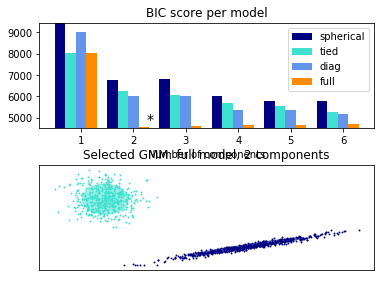

In [8]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: full model, 2 components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

## 11. Demo of DBSCAN clustering algorithm


Finds core samples of high density and expands clusters from them.



Estimated number of clusters: 3
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


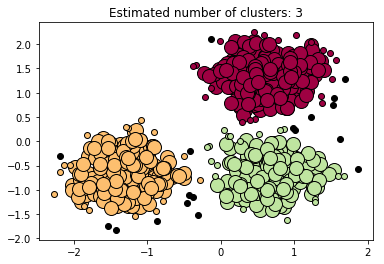

In [3]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Automatically created module for IPython interactive environment
Computing embedding


/users/sulixin/env/lib/python3.5/site-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


Done.
ward : 0.27s
average : 0.22s
complete : 0.19s


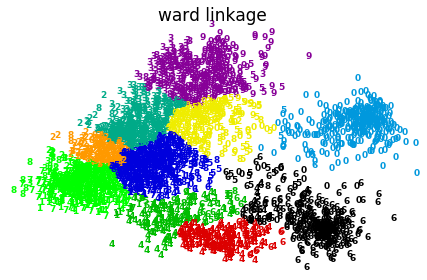

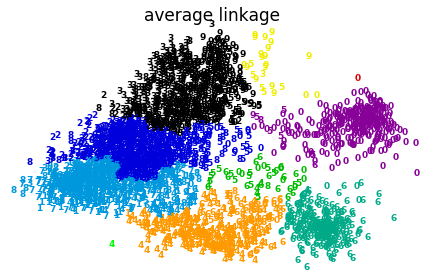

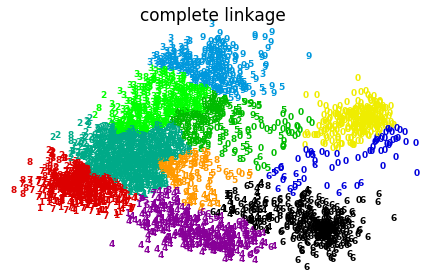

In [9]:
# Authors: Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2014

print(__doc__)
from time import time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

from sklearn import manifold, datasets

digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

np.random.seed(0)

def nudge_images(X, y):
    # Having a larger dataset shows more clearly the behavior of the
    # methods, but we multiply the size of the dataset only by 2, as the
    # cost of the hierarchical clustering methods are strongly
    # super-linear in n_samples
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


X, y = nudge_images(X, y)


#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s : %.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, X, clustering.labels_, "%s linkage" % linkage)


plt.show()

## 12. A demo of the Spectral Biclustering/Coclustering algorithm

This example demonstrates how to generate a checkerboard dataset and bicluster it using the Spectral Biclustering algorithm.

The data is generated with the make_checkerboard function, then shuffled and passed to the Spectral Biclustering algorithm. The rows and columns of the shuffled matrix are rearranged to show the biclusters found by the algorithm.

The outer product of the row and column label vectors shows a representation of the checkerboard structure.

Automatically created module for IPython interactive environment
consensus score: 1.0


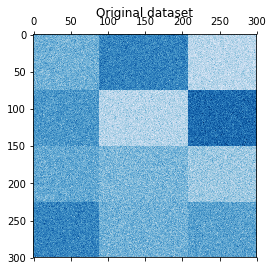

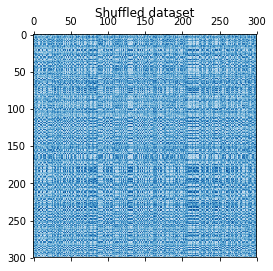

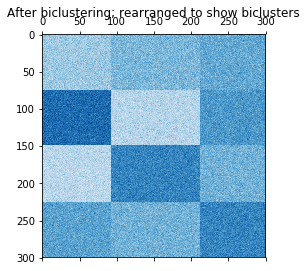

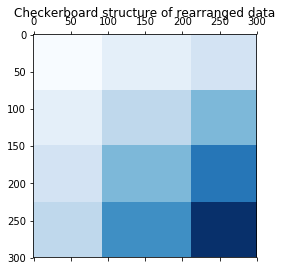

In [10]:
print(__doc__)

# Author: Kemal Eren <kemal@kemaleren.com>
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_checkerboard
from sklearn.datasets import samples_generator as sg
from sklearn.cluster.bicluster import SpectralBiclustering
from sklearn.metrics import consensus_score

n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10,
    shuffle=False, random_state=0)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

data, row_idx, col_idx = sg._shuffle(data, random_state=0)
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

model = SpectralBiclustering(n_clusters=n_clusters, method='log',
                             random_state=0)
model.fit(data)
score = consensus_score(model.biclusters_,
                        (rows[:, row_idx], columns[:, col_idx]))

print("consensus score: {:.1f}".format(score))

fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

plt.matshow(np.outer(np.sort(model.row_labels_) + 1,
                     np.sort(model.column_labels_) + 1),
            cmap=plt.cm.Blues)
plt.title("Checkerboard structure of rearranged data")

plt.show()